In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [3]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5
)

In [4]:
image_gen_train.fit(x_train)

In [5]:
x_train_subset1 = np.squeeze(x_train[:12])
x_train_subset2 = x_train[:12]

In [6]:
fig = plt.figure(figsize=(20, 2))
plt.set_cmap('gray')

<Figure size 1440x144 with 0 Axes>

In [7]:
for i in range(0, len(x_train_subset1)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset1[i])
fig.suptitle('Subset of Original Trainig Images', fontsize=20)
plt.show()

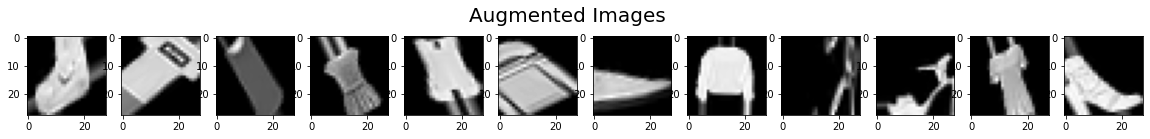

In [8]:
fig = plt.figure(figsize=(20, 2))
for x_batch in image_gen_train.flow(x_train_subset2, batch_size=12, shuffle=False):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(np.squeeze(x_batch[i]))
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break

In [9]:
import tensorflow as tf
import os

In [10]:
fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

In [13]:
checkpoint_save_path = './checkpoint/fashion.ckpt'
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model------------')
    model.load_weights(checkpoint_save_path)

In [14]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

In [15]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4947 - sparse_categorical_accuracy: 0.8255 - val_loss: 0.4121 - val_sparse_categorical_accuracy: 0.8516 loss: 0.5472 - sparse_cat
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3764 - sparse_categorical_accuracy: 0.8638 - val_loss: 0.3815 - val_sparse_categorical_accuracy: 0.8608
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3389 - sparse_categorical_accuracy: 0.8766 - val_loss: 0.3950 - val_sparse_categorical_accuracy: 0.8542
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3123 - sparse_categorical_accuracy: 0.8846 - val_loss: 0.3792 - val_sparse_categorical_accuracy: 0.8632
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - sparse_categorical_accuracy: 0.8909 - val_loss: 0.3505 - val_sparse_categorical_accuracy: 0.8739


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
import tensorflow as tf
import os
import numpy as np

np.set_printoptions(threshold=np.inf)

In [18]:
fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

In [21]:
checkpoint_save_path = './checkpoint/fashion.ckpt'
if os.path.exists(checkpoint_save_path + '.index'):
    print('----------------load the model----------------')
    model.load_weights(checkpoint_save_path)

----------------load the model----------------


In [22]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                save_weights_only=True,
                                                save_best_only=True)

In [23]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_train, y_train), validation_freq=1, callbacks=[cp_callback])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2806 - sparse_categorical_accuracy: 0.8959 - val_loss: 0.2536 - val_sparse_categorical_accuracy: 0.9063
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2686 - sparse_categorical_accuracy: 0.8991 - val_loss: 0.2623 - val_sparse_categorical_accuracy: 0.9036
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2572 - sparse_categorical_accuracy: 0.9047 - val_loss: 0.2330 - val_sparse_categorical_accuracy: 0.9129
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2470 - sparse_categorical_accuracy: 0.9079 - val_loss: 0.2341 - val_sparse_categorical_accuracy: 0.9129
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2388 - sparse_categorical_accuracy: 0.9102 - val_loss: 0.2297 - val_sparse_categorical_accuracy: 0.9129


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (32, 784)                 0         
_________________________________________________________________
dense_2 (Dense)              (32, 128)                 100480    
_________________________________________________________________
dense_3 (Dense)              (32, 10)                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
print(model.trainable_variables)

[<tf.Variable 'dense_2/kernel:0' shape=(784, 128) dtype=float32, numpy=
array([[-2.33099654e-01,  6.36970550e-02,  7.12059960e-02,
         1.12469092e-01, -3.72111499e-02, -3.12616616e-01,
        -4.05276746e-01,  2.21814290e-01, -9.36956704e-02,
        -7.17235170e-03, -1.37062326e-01, -3.49878371e-02,
         9.75101516e-02, -2.13565484e-01, -4.90995264e-03,
         5.47478311e-02,  6.56188503e-02,  1.46496877e-01,
         1.64939538e-01, -1.12071685e-01, -3.94832581e-01,
        -1.66485399e-01,  1.51661754e-01, -3.71724293e-02,
        -6.48649409e-02, -1.84946448e-01,  3.01119298e-01,
        -1.86279453e-02,  4.15324420e-01,  3.86690646e-01,
        -1.25412062e-01, -6.84373379e-02,  4.12053108e-01,
        -6.47876933e-02,  3.34675580e-01, -2.04963386e-02,
         1.91384867e-01,  1.64403021e-01,  1.89050704e-01,
        -6.42774701e-02,  2.75747925e-02,  9.95265469e-02,
        -2.91557349e-02,  8.84292275e-03, -4.38244548e-03,
         2.74684560e-02,  3.40408951e-01, -

In [26]:
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()